In [18]:
import pandas as pd
df = pd.read_csv('data/telecom-churn.csv')
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

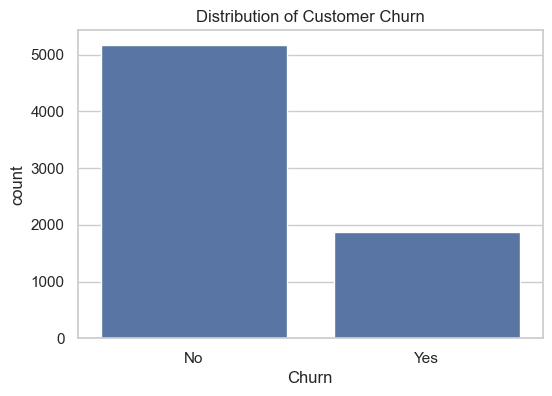

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Churn', data = df)
plt.title('Distribution of Customer Churn')
plt.show()

print(df['Churn'].value_counts(normalize = True))

In [20]:
print(df.isnull().sum())
print(df.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

print("Stage1: Data cleaning completed successfully!")

Missing values in TotalCharges: 11
Stage1: Data cleaning completed successfully!


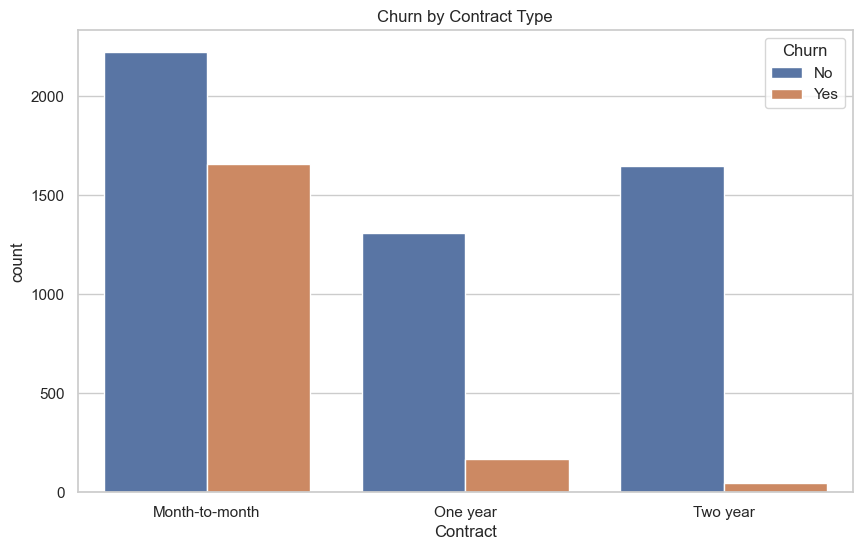

In [22]:
plt.figure(figsize =(10, 6))
sns.countplot(x = 'Contract', hue = 'Churn', data = df)
plt.title('Churn by Contract Type')
plt.show()

In [23]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Initial Observation: Contract type is a key factor affecting churn.

In [25]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(data = df, columns = multi_cols)

print("Encoding finished! All text converted to numbers.")
df.head()
print(df.dtypes)
print(f"Current shape of the data: {df.shape}")

Encoding finished! All text converted to numbers.
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes              

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total samples: {len(X)}")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

print("\nReady for model training!")

Total samples: 7043
Training set: 5634 samples
Testing set: 1409 samples

Ready for model training!


In [27]:
from sklearn.linear_model import LogisticRegression
# 1. Initialize the model 
# We set max_iter to 1000 to ensure the algorithm has enough time to find the best solution
model = LogisticRegression(max_iter = 1000)

In [28]:
# 2. Fit the model
model.fit(X_train, y_train)
print("Training Complete! The model has finished learning.")

Training Complete! The model has finished learning.


/Applications/miniconda3/envs/ds_churn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# 3. Predict the results
y_pred = model.predict(X_test)
print("Predictions finished. Generating the report...")

Predictions finished. Generating the report...


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Print the overall accuracy
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Print the Confusion Matrix
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

# Print the detailed Performance Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Overall Accuracy: 0.82

--- Confusion Matrix ---
[[932 104]
 [149 224]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



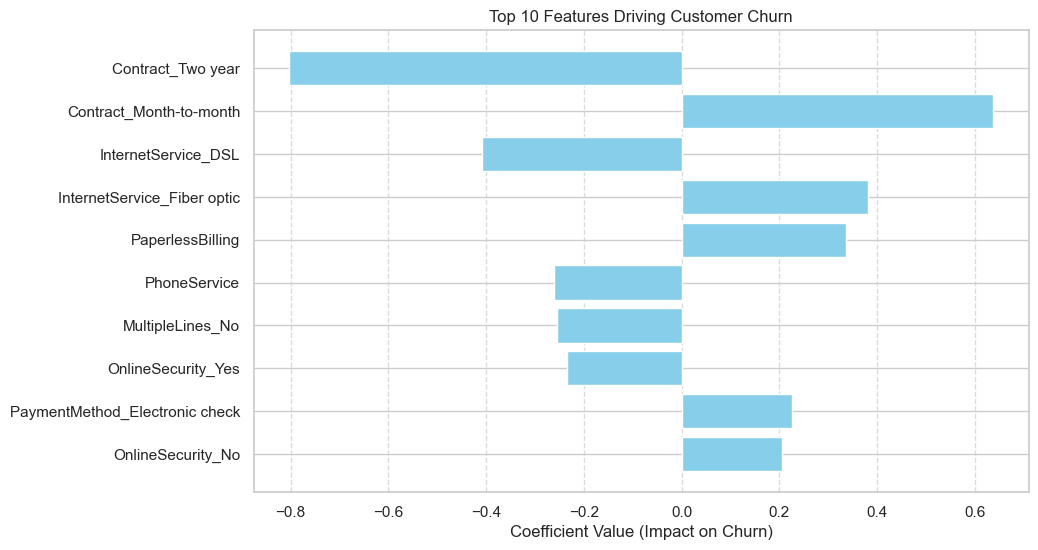

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract model coefficients
# Positive coefficients increase the probability of churn
# Negative coefficients decrease the probability of churn
importance = model.coef_[0]
feature_names = X.columns

# 2. Organize data into a DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importance
})

# 3. Sort by absolute value to find the most influential factors
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# 4. Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10], color='skyblue')
plt.xlabel('Coefficient Value (Impact on Churn)')
plt.title('Top 10 Features Driving Customer Churn')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Model 2: Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the Random Forest model
# n_estimators=100 means we are using 100 decision trees to vote
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Fit the model
rf_model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# 4. Show the results
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7949

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



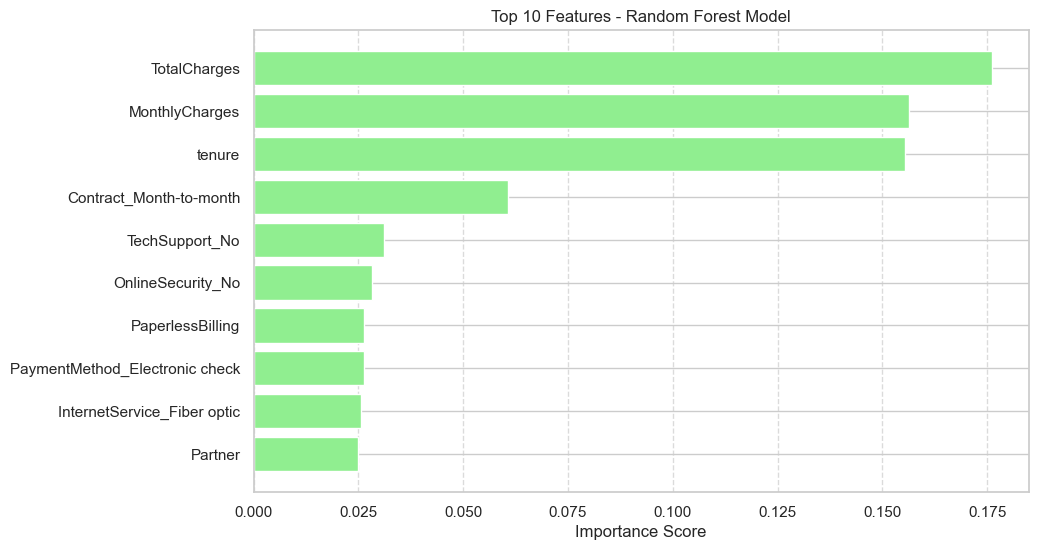

In [37]:
import numpy as np

# 1. Get feature importances
rf_importance = rf_model.feature_importances_
feature_names = X.columns

# 2. Organize into a DataFrame
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': rf_importance
})

# 3. Sort by importance
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

# 4. Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'][:10], rf_feature_importance['Importance'][:10], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Top 10 Features - Random Forest Model')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# Try to limit the depth of the trees to prevent overfitting
refined_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
refined_rf.fit(X_train, y_train)

refined_pred = refined_rf.predict(X_test)
print(f"Refined Random Forest Accuracy: {accuracy_score(y_test, refined_pred):.4f}")

Refined Random Forest Accuracy: 0.8062


In [39]:
# 1. Get the probability of churn (instead of just 0 or 1)
# predict_proba returns [prob_of_not_churn, prob_of_churn]
probabilities = model.predict_proba(X_test)[:, 1]

# 2. Create a DataFrame for the results
results_df = pd.DataFrame({
    'Actual_Churn': y_test,
    'Churn_Probability': probabilities
})

# 3. Sort by probability to find the most "at-risk" customers
high_risk_customers = results_df.sort_values(by='Churn_Probability', ascending=False)

# 4. Display the top 10 most likely to leave
print("--- Top 10 High-Risk Customers ---")
print(high_risk_customers.head(10))

# 5. Export this to a CSV file for the Marketing Team
high_risk_customers.to_csv('high_risk_churn_list.csv', index=False)
print("\nSuccess! The high-risk list has been saved as 'high_risk_churn_list.csv'.")

--- Top 10 High-Risk Customers ---
      Actual_Churn  Churn_Probability
2208             1           0.837584
4800             1           0.836973
1410             1           0.832429
2577             1           0.813433
3346             0           0.810454
2184             1           0.802867
2191             1           0.801274
585              1           0.797500
2167             1           0.794761
3078             1           0.793381

Success! The high-risk list has been saved as 'high_risk_churn_list.csv'.
